# Testing Redshift Tomographic Bins

In [1]:
import pyccl as ccl
print(f"I am using pyccl version {ccl.__version__}")
import numpy as np
import scripts.plotting as p
import matplotlib.pyplot as plt
from scripts.nz_metrics import NZMetrics
from scripts.presets import Presets
from scripts.tomographic_binning import TomographicBinning
from scripts.srd_redshift_distributions import SRDRedshiftDistributions

I am using pyccl version 2.8.0


In [2]:
# This analysis will be done for a cosmology with the following parameters
# if you want to change the cosmology, you can do it here or just run without it.
# For now, we will keep it as is.
#cosmo = ccl.Cosmology(Omega_c=0.27, Omega_b=0.045, h=0.67, sigma8=0.83, n_s=0.96)

# The class has default values for the maximal redshift and the resolution of redshifts.
# You can change them if you want to or run the default values.
# Since we are investigating the impact of the resolution of redshifts,
# we will keep the maximal redshift as is (for now) and only change the redshift resolution.
redshift_max = 3.5
redshift_resolution_1 = 300  # this is the first resolution of redshifts
redshift_resolution_2 = 5000  # this is the second resolution of redshifts
forecast_year = "1"
# Please note that the redshift resolution is the number of redshifts between 0 and redshift_max.
# Additionally, a lot of parametric sweeping is already coded into helper functions 
# so we will not need to worry about that for now.

# We will also investigate ell binning but for this particular exercise,
# we will keep the ell binning at default values.
#ell_min = 20
#ell_max = 2000
#n_ell = 50

# We now initialize the class by only passing the redshift information.
presets = Presets(redshift_max=redshift_max,
                  redshift_resolution=redshift_resolution_1,
                  forecast_year=forecast_year)
redshift_range = presets.redshift_range
# Initialise the tomographic binning class
bin = TomographicBinning(presets)
# Get your source and lens redshift distributions
sources = SRDRedshiftDistributions(presets).source_sample()
lenses = SRDRedshiftDistributions(presets).lens_sample()
# Get the source and lens tomo bins
source_bins = bin.source_bins()
lens_bins = bin.lens_bins()
# Get the bin centers for the source and lens bins
source_bin_centers = bin.source_bin_centers()
lens_bin_centers = bin.lens_bin_centers()
# Now we can initialize the NZMetrics class
# This class contains metrics that can be used to compare
# different redshift distributions and tomographic bins.
nzm = NZMetrics(presets)


Data saved to data_output/redshift_distributions/source_sample_y1.npy
Data saved to data_output/redshift_distributions/lens_sample_y1.npy
Data saved to data_output/redshift_distributions/source_bins_y1.npy
Data saved to data_output/redshift_distributions/lens_bins_y1.npy


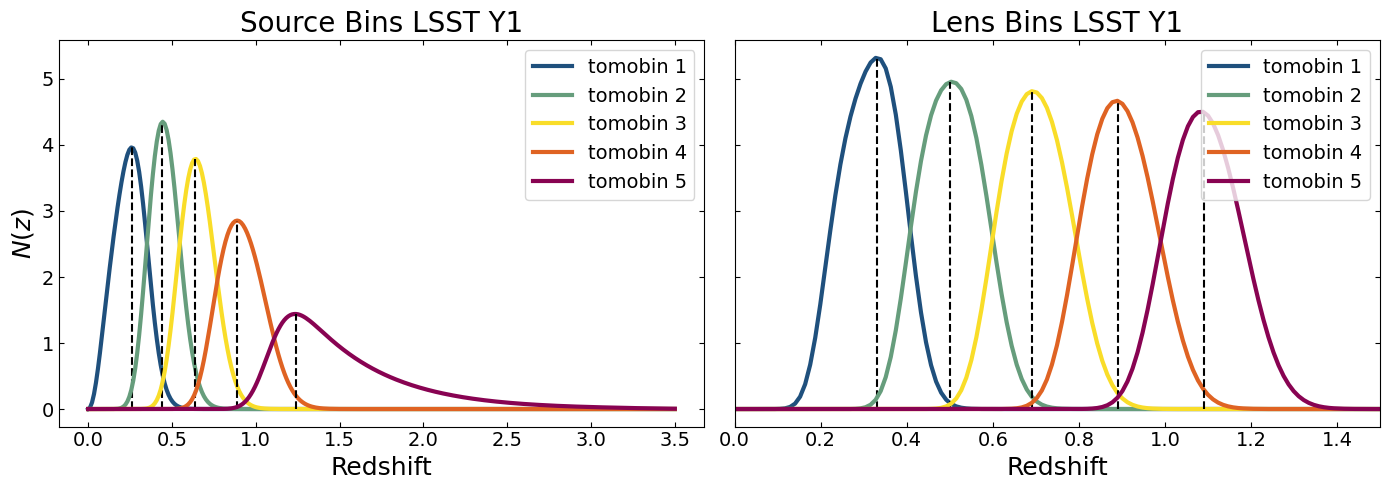

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

source_colors = p.get_colors(source_bins.keys())
lens_colors = p.get_colors(lens_bins.keys())
lw=3
# Plot for source bins on the first panel
for i in source_bins.keys():
    axes[0].plot(redshift_range, source_bins[i], lw=lw, c=source_colors[i], label=f"tomobin {i+1}")
    axes[0].vlines(x=source_bin_centers[i], ymin=0, ymax=np.max(source_bins[i]), color='k', linestyle='--')
    axes[0].legend(loc='upper right', fontsize=14)
axes[0].tick_params(axis='both', which='major', labelsize=14, direction='in', top=True, right=True)
axes[0].set_xlabel("Redshift", fontsize=18)
axes[0].set_ylabel("$N(z)$", fontsize=18)
axes[0].set_title(f"Source Bins LSST Y{forecast_year}", fontsize=20)

# Plot for lens bins on the second panel
for i in lens_bins.keys():
    axes[1].plot(redshift_range, lens_bins[i], lw=lw, c=lens_colors[i], label=f"tomobin {i+1}")
    axes[1].vlines(x=lens_bin_centers[i], ymin=0, ymax=np.max(lens_bins[i]), color='k', linestyle='--')
    axes[1].legend(loc='upper right', fontsize=14)
axes[1].tick_params(axis='both', which='major', labelsize=14, direction='in', top=True, right=True)
axes[1].set_xlabel("Redshift", fontsize=18)
axes[1].set_xlim(0, 1.5)
axes[1].set_title(f"Lens Bins LSST Y{forecast_year}", fontsize=20)

plt.tight_layout()
plt.show()


In [26]:
%%time
bin_centers_zres_comparison = nzm.compare_bin_centers_over_zresolutions()

Data saved to data_output/bin_centers/bin_centers_resolutions_y1_zmax3.5_ccl_v2.8.0.npy
CPU times: user 4.24 s, sys: 88.6 ms, total: 4.33 s
Wall time: 4.38 s


In [27]:
%%time
bin_centers_sweep_over_zres_and_zmax = nzm.compare_bin_centers_over_zresolutions_and_zmax()

Data saved to data_output/bin_centers/bin_centers_resolutions_by_zmax_y1_zmax_range_3.0_to_4.0_ccl_v2.8.0.npy
CPU times: user 45.6 s, sys: 858 ms, total: 46.5 s
Wall time: 47.3 s


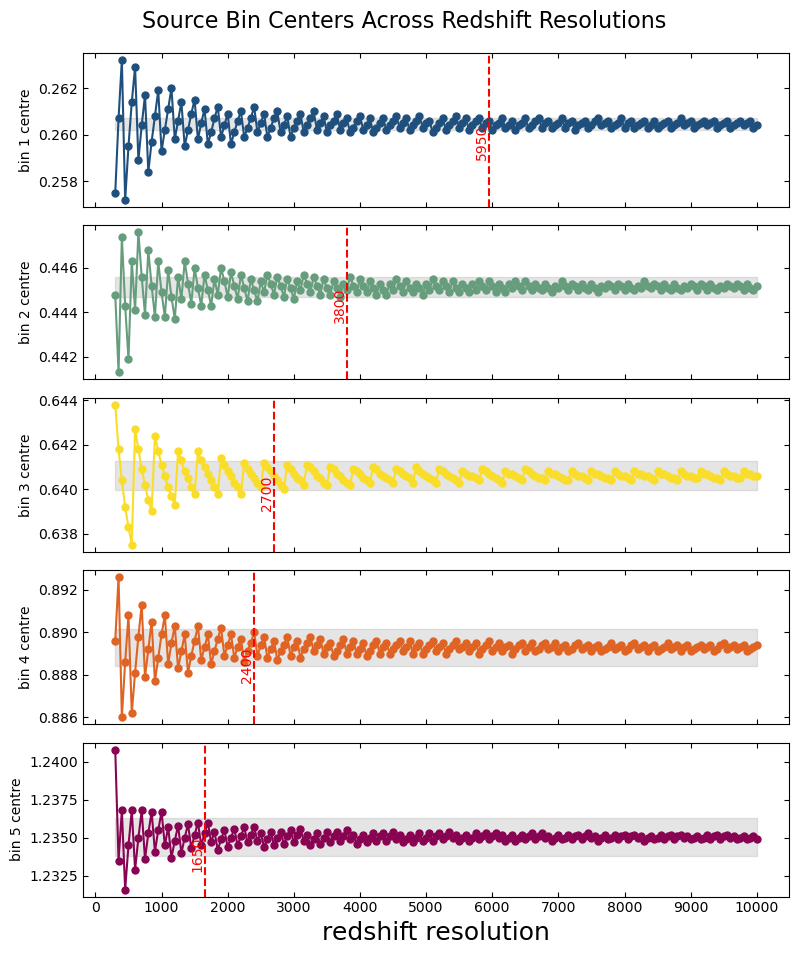

In [29]:
p.plot_bin_centers_subplots(bin_centers_zres_comparison,
                            zmax=redshift_max,
                            forecast_year=forecast_year,
                            bin_type="source",
                            percentage=0.1,
                            title_pad=0.95)

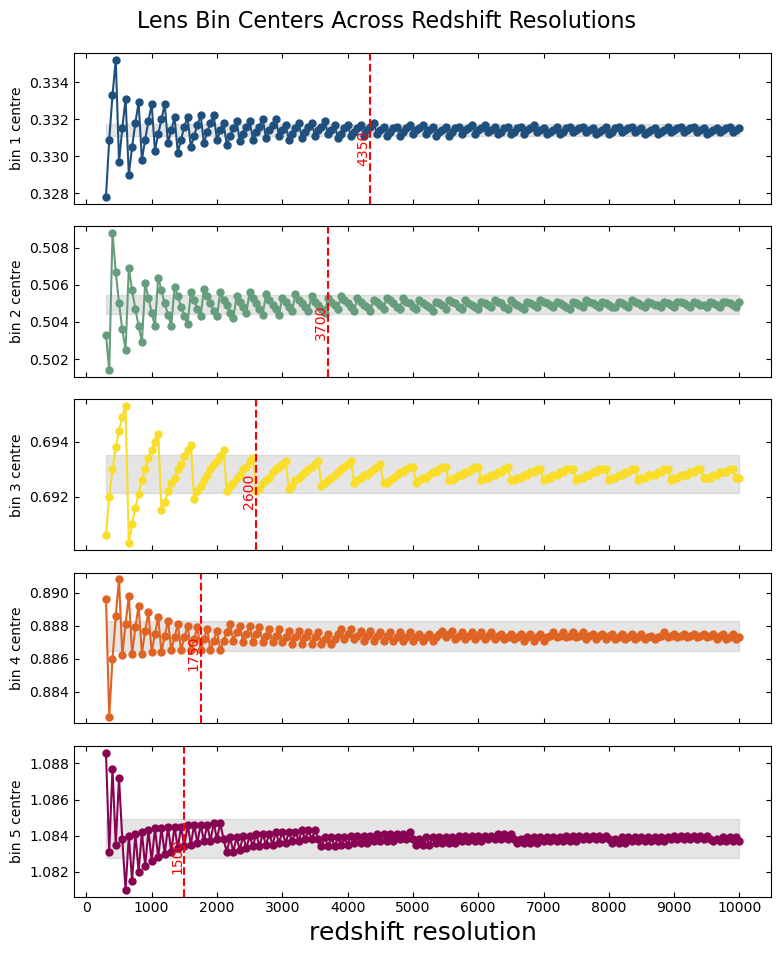

In [30]:
p.plot_bin_centers_subplots(bin_centers_zres_comparison,
                            zmax=redshift_max,
                            forecast_year=forecast_year,
                            bin_type="lens",
                            percentage=0.1,
                            title_pad=0.95)

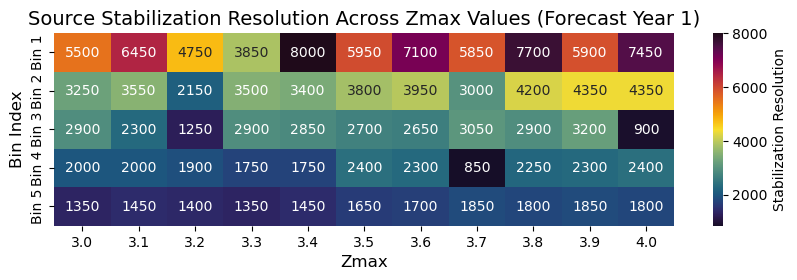

In [33]:
# Note: if you see a blank cell in the heatmap, it means that we are out of range (aka
# there are no stable values for the particualr tomo bin in terms of the combination of
# percentage tolerance and number of stability steps.
# You can adjust either the percentage or the stability steps and rerun the cell.
p.plot_tomobin_stabilization_resolution_heatmap(bin_centers_sweep_over_zres_and_zmax,
                                        bin_type="source",
                                        forecast_year=forecast_year,
                                        percentage=0.1,
                                        stability_steps=10)

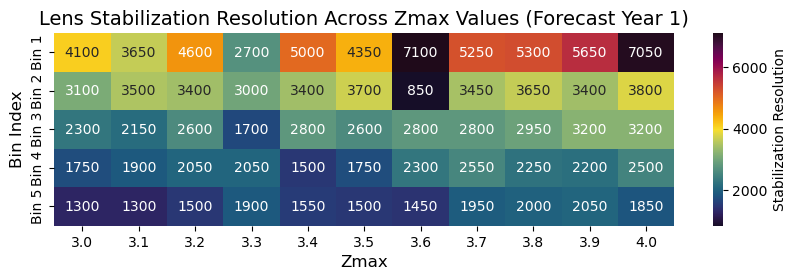

In [32]:
p.plot_tomobin_stabilization_resolution_heatmap(bin_centers_sweep_over_zres_and_zmax,
                                        bin_type="lens",
                                        forecast_year=forecast_year,
                                        percentage=0.1,
                                        stability_steps=10)

In [ ]:
percs = np.linspace(0.005, 1, num=10)
p.plot_stabilization_vs_percentage(bin_centers_comparison, bin_type="source", percentages=percs, stability_steps=10)

In [ ]:
p.plot_stabilization_vs_percentage(bin_centers_comparison, bin_type="lens", percentages=percs, stability_steps=10)